# Demo 1: Simulación de un modelo de difusión

En esta primera demo vamos a entender de forma sencilla cómo funcionan los modelos de difusión.

El proceso se divide en dos fases:
1. **Forward process (difusión directa):** degradamos una imagen añadiendo ruido paso a paso hasta que queda irreconocible.
2. **Reverse process (difusión inversa):** tratamos de limpiar ese ruido para recuperar la imagen.

Aquí no vamos a entrenar una red neuronal como la U-Net, sino que haremos una versión simplificada para visualizar el concepto.


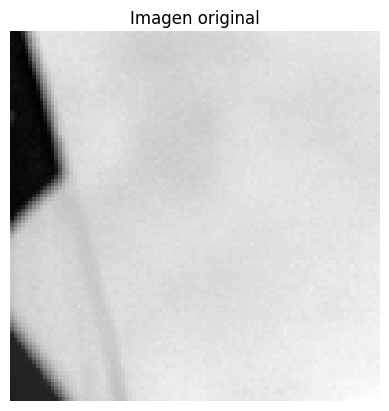

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, img_as_float

# Cargar una imagen simple en escala de grises
image = color.rgb2gray(img_as_float(data.astronaut()))
image = image[50:150, 50:150]  # recorte para simplificar

plt.imshow(image, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()


## Forward process: añadir ruido

El forward process consiste en **degradar la imagen original** añadiendo ruido paso a paso.  
Cuantos más pasos hacemos, más ruido se acumula, hasta que la imagen deja de ser reconocible.


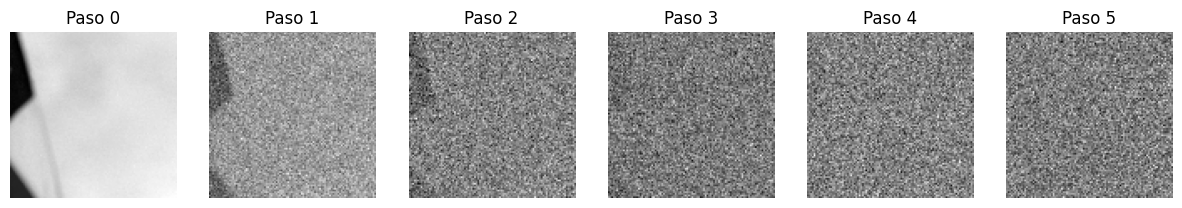

In [2]:
def add_noise(img, t, T):
    """
    Añade ruido gaussiano a la imagen en función del paso t.
    - img: imagen base
    - t: paso actual
    - T: número total de pasos
    """
    noise = np.random.normal(0, 1, img.shape)
    alpha = 1 - (t / T)
    return alpha * img + (1 - alpha) * noise

# Mostrar la imagen degradada progresivamente
T = 6  # número de pasos
fig, axs = plt.subplots(1, T, figsize=(15,3))
for t in range(T):
    axs[t].imshow(add_noise(image, t, T-1), cmap="gray")
    axs[t].axis("off")
    axs[t].set_title(f"Paso {t}")
plt.show()
